## Relational Databases

### Relational Database Management Systems (RDBMS)

Relational database management systems (RDBMS) is a database system that is based on the relational model of <a href="http://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf">Codd, "A Relational Model of Data for Large Shared Data Banks", 1970.</a>

- a computer application that stores data in a structured way, and allows users to interact with that data.
- organizes the data in tables

A few fundamental properties of the relational model (from Codd 1970):

1. Each row is an n-tuple
2. The ordering of rows is unimportant
3. The rows are distinct
4. The ordering of columns is significant because each corresponds to a unique attribute
5. Each column has a descriptive name

The main advantage of having a separate language SQL that works over many RDBMSs is that we can write code that works regardless of the database engine.

The paper, Codd 1970, begins with the following,

> "Future users of large data banks must be protected from
having to know how the data is organized in the machine (the
internal representation). A prompting service which supplies
such information is not a satisfactory solution. Activities of users
at terminals and most application programs should remain
unaffected when the internal representation of data is changed
and even when some aspects of the external representation
are changed." Codd 1970.

  The top RDBMSs are 
  - Oracle Database, 
  - Microsoft SQL Server, 
  - MySQL,
  - SQLite

### Structured Query Language (SQL)

SQL is a declarative language in that it is based on logical statements that are interpreted by the RDBMS.

You can create a table with the code,

```
create table animals (
    name text,
    species text,
    age integer,
    shelter_id integer)
```
- generate an empty table called animals that has 4 columns.

### Basic commands

You can then insert rows into the table with
```
insert into animals values ("Emmy", "dog", 1, "CA")
```

Furthermore, we can retrieve records with the select statement by
```
select * from animals
```
which will return the entire animals table.

### Functions and Clauses

You can add a "where" clause to the select statement: 
```
select * from animals where species="dog"
```
This will select only the records with the species set to 'dog'.
Other operators can be used, such as ``=,<,>,!=,between,like,in,is not null, as``, where 'like' will match patterns for text, and 'as' can change a field name in the select statement.

You can apply functions and select specific columns with the select statement as in 
```
select name, log(age + 1) from animals
```    
Moreover, there are aggregating functions such as in 
```
select count(*) from animals
```
which will return the number of records.

### Functions and Clauses

The group by clause, as in 
```
select avg(age), count(*) from animals group by species
```
will group the records by species and then apply aggregations within the groups.
Another common clause is the order by clause as in 
```
select name from animals where species="dog" order by age
```
will return the dogs in ascending order of age.
The groupby and aggregation operations are already familiar to those familiar with Pandas.  You should think of the SQL grammar as the basis for the interface to DataFrames.

### Other statements

Other statements: ``insert, update, alter table, drop table``.

- With insert you can add records, and update will let you modify records.
- With alter table you can add and drop columns, and drop table will remove the table all together.

In day to day operations of data scientists, select statements are extremely common, where modifications to existing tables are done offline in scripts.
In this lesson we will use pandas to construct the table and make the sql select statements.

### Joins tables

We have already talked about joining tables.
To see the animals in a county, then we will need to join these tables.
We can do this by
```
select * from animals join shelters on animals.shelter_id = shelters.id
```
Outer join is done by 
```
select * from animals outer join shelters on animals.shelter_id = shelters.id
```
inner join is similar.

### Pandas and SQLAlchemy

- The sqlalchemy package provides a unified way to interact with many different RDBMSs.
- You have to begin by initializing the connection to a database, which is done by the <code>create_engine</code> command.

```
from sqlalchemy import create_engine
    disk_engine = create_engine('sqlite:///pets.sqlite')
```

- creates the connection to the sqlite file that will contain your database.
- you can use the methods: <code>pd.to_sql, pd.read_sql_query</code>.
- A typical way to use pandas then would be to construct the table in chunks and write to the database.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlalchemy as sqla
plt.style.use('ggplot')

### Reading in chunks with Pandas

- set ``chunksize`` to create a DataFrameReader
- Iterable which returns the file in sequence
- Work on first chunk to convert to table

## DOB Job Application Filings data

- New York City Department of Buildings applications: https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2

> This dataset contains all job applications submitted through the Borough Offices, through eFiling, or through the HUB, which have a "Latest Action Date" since January 1, 2000. This dataset does not include jobs submitted through DOB NOW. See the DOB NOW: Build – Job Application Filings dataset for DOB NOW jobs.

In [2]:
nycjobs_reader = pd.read_csv('data/DOB_Job_Application_Filings.csv',
                             chunksize=10000,low_memory=False,encoding='latin-1')

In [3]:
nycjobs_chunk = next(nycjobs_reader)
nyc_cols = nycjobs_chunk.columns
nycjobs_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job #                          10000 non-null  int64  
 1   Doc #                          10000 non-null  int64  
 2   Borough                        10000 non-null  object 
 3   House #                        10000 non-null  object 
 4   Street Name                    10000 non-null  object 
 5   Block                          9999 non-null   float64
 6   Lot                            9999 non-null   float64
 7   Bin #                          10000 non-null  int64  
 8   Job Type                       10000 non-null  object 
 9   Job Status                     10000 non-null  object 
 10  Job Status Descrp              10000 non-null  object 
 11  Latest Action Date             10000 non-null  object 
 12  Building Type                  10000 non-null  

In [4]:
nycjobs_chunk.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673497,1,QUEENS,215-02,93 AVENUE,10618.0,28.0,4226672,A2,R,...,N,NaN,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0
1,440673512,1,QUEENS,10040,222 STREET,10780.0,19.0,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0
2,210182309,2,BRONX,97,WEST 169 STREET,2519.0,27.0,2130622,NB,D,...,N,NaN,V0,0,40.839538,-73.923177,16.0,211.0,Highbridge,NaN
3,210182309,3,BRONX,97,WEST 169 STREET,2519.0,27.0,2130622,NB,D,...,N,NaN,V0,0,40.839538,-73.923177,16.0,211.0,Highbridge,NaN
4,421133972,2,QUEENS,88-36,139TH STREET,9620.0,33.0,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24.0,214.0,Briarwood-Jamaica Hills,NaN


In [5]:
## Create database engine
sqlite_file = 'data/nycjobs.sqlite'
nyc_conn = sqla.create_engine('sqlite:///' + sqlite_file)

In [6]:
## Fill in dataframe
nycjobs_chunk.to_sql('jobs',nyc_conn,if_exists='replace')
for nycjobs_chunk in nycjobs_reader:
    nycjobs_chunk.to_sql('jobs',nyc_conn,if_exists='append')

In [7]:
## count all records
pd.read_sql_query("select count(*) from jobs",nyc_conn)

,count(*)
0,1773895


In [8]:
## where statement filters
pd.read_sql_query("select count(*) from jobs where Plumbing='X'",nyc_conn)

,count(*)
0,555733


In [9]:
## groupby operation
pd.read_sql_query("select Plumbing, count(*) as count from jobs group by Plumbing",nyc_conn)

,Plumbing,count
0,None,1218162
1,X,555733


In [10]:
## Multiline query
sql_query = """
select * from jobs 
where Plumbing='X' 
order by "Initial Cost" desc
limit 5000
"""
plumbing = pd.read_sql_query(sql_query,nyc_conn)

In [11]:
plumbing.head()

,index,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,524620,120653417,1,MANHATTAN,1817,2ND AVE,1540.0,22.0,1049222,A2,...,N,None,C7,0,40.783041,-73.947981,5.0,15601.0,Yorkville,1049222.0
1,214522,402326595,1,QUEENS,5005,31 AVENUE,752.0,1.0,4014094,A2,...,N,None,W1,0,40.757499,-73.908898,22.0,163.0,Astoria,4014094.0
2,1552548,104288245,1,MANHATTAN,157,WEST 85 STREET,1216.0,8.0,1032143,A2,...,N,None,C5,0,40.786473,-73.974231,6.0,169.0,Upper West Side,1032143.0
3,1015628,421344833,1,QUEENS,61-25,98TH STREET,2093.0,1.0,4431961,A2,...,N,None,D4,0,40.734257,-73.860517,29.0,71702.0,Rego Park,4431961.0
4,627276,320528185,1,BROOKLYN,237,PARKVILLE AVENUE,5424.0,77.0,3127947,A1,...,N,None,A5,0,40.631530,-73.970112,40.0,482.0,Flatbush,3127947.0


In [12]:
## Plot the initial cost histogram
plumbing['Initial Cost'] = plumbing['Initial Cost'].map(lambda x: int(x[1:-3]))

<AxesSubplot:ylabel='Frequency'>

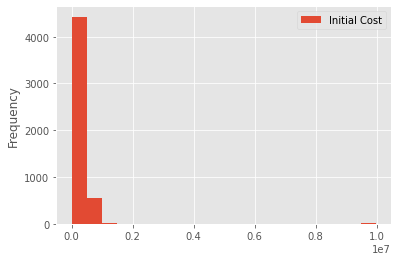

In [13]:
plumbing.plot(y = 'Initial Cost',kind='hist',bins=20)

In [14]:
## Detect some missingness
query = """select "Owner's Business Name", count(*) as count from jobs 
    where "Owner's Business Name"!=" " 
    group by "Owner's Business Name" 
    limit 1000"""
owner_counts = pd.read_sql_query(query,nyc_conn)

In [15]:
owner_counts.head()

,Owner's Business Name,count
0,# 1 DUMPLING,1
1,# 2 PALISA,1
2,# 3 Gamercy Park Ass.,1
3,#1 CHINESE,1
4,#1 CHINESE REST,1


In [16]:
owner_counts['count'].max()

3146

In [17]:
(owner_counts['count'] > 1000).sum()

2

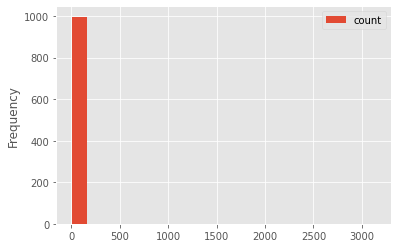

In [18]:
_ = owner_counts.plot(y="count",kind='hist',bins=20)